# **Car Sales Price Prediction - ML** 

- Sales prediction involves forecasting the amount of a product that 
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.
- In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize Machine Learning
techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let's embark on
the journey of sales prediction using Machine Learning in Python.

### libraries

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load dataset
df = pd.read_csv("car_purchasing.csv", encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


# **Data Preprocessing**

In [4]:
# Shape of dataset
df.shape

(500, 9)

In [5]:
# Columns of dataset
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [6]:
# information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [7]:
# Checking null values
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

<Axes: >

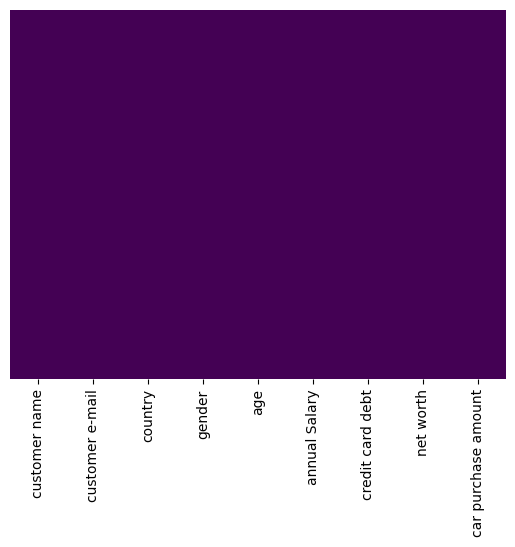

In [8]:
#visualize the nan values in heatmap
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [9]:
# droping columns
df.drop(columns=['customer name', 'customer e-mail', 'country'], inplace = True)

In [10]:
# unique values of all columns in dataset
df.nunique()

gender                   2
age                    500
annual Salary          500
credit card debt       500
net worth              500
car purchase amount    500
dtype: int64

In [12]:
# Checking duuplicates
df.duplicated().sum()

0

In [13]:
# Checking datatypes of columns
df.dtypes

gender                   int64
age                    float64
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object

In [14]:
# Statistics of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,500.0,0.506000,0.500465,0.0,0.000000,1.000000,1.000000,1.0
age,500.0,46.241674,7.978862,20.0,40.949969,46.049901,51.612263,70.0
annual Salary,500.0,62127.239608,11703.378228,20000.0,54391.977195,62915.497035,70117.862005,100000.0
credit card debt,500.0,9607.645049,3489.187973,100.0,7397.515792,9655.035568,11798.867487,20000.0
net worth,500.0,431475.713625,173536.756340,20000.0,299824.195900,426750.120650,557324.478725,1000000.0
car purchase amount,500.0,44209.799218,10773.178744,9000.0,37629.896040,43997.783390,51254.709517,80000.0


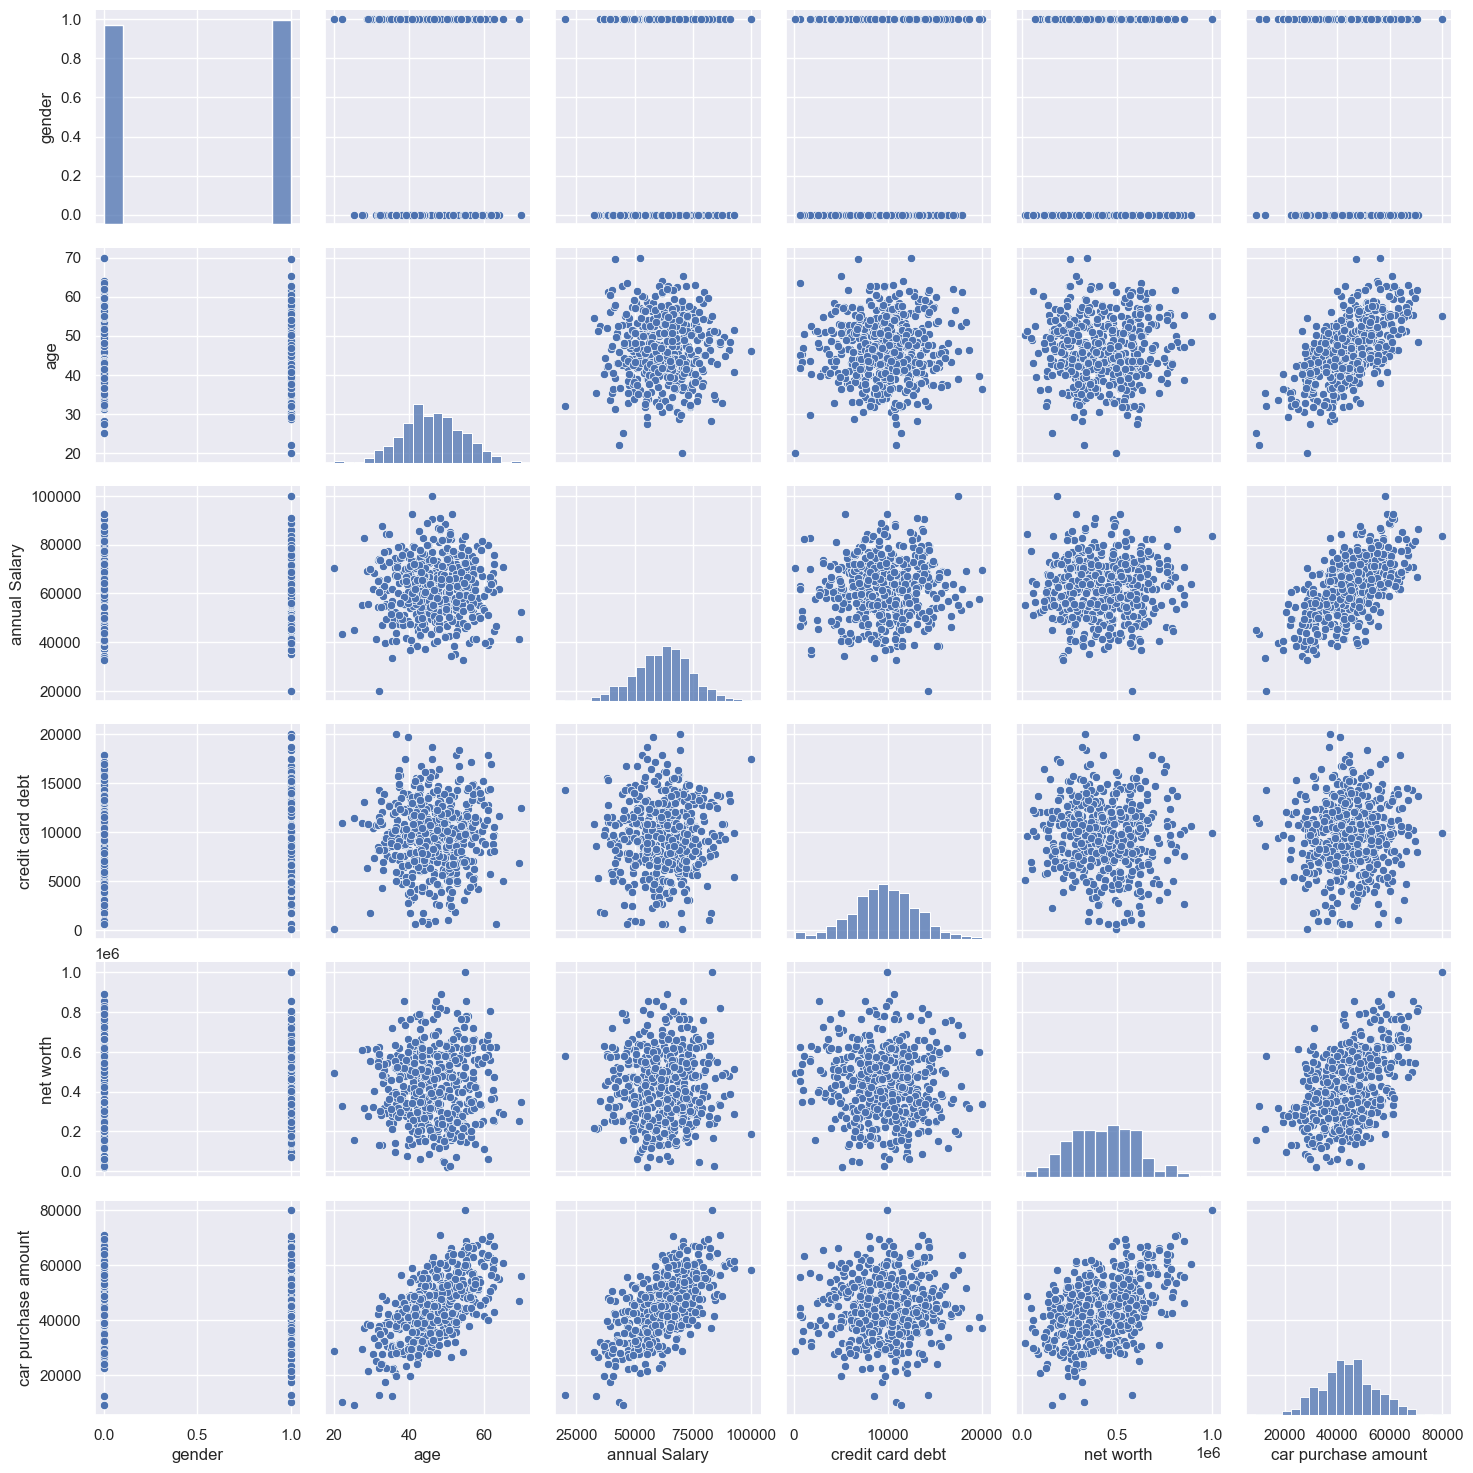

In [73]:
# Pair plot of data
sns.pairplot(df)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11988\3147996150.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j],kde=True, bins=11,color='yellow')


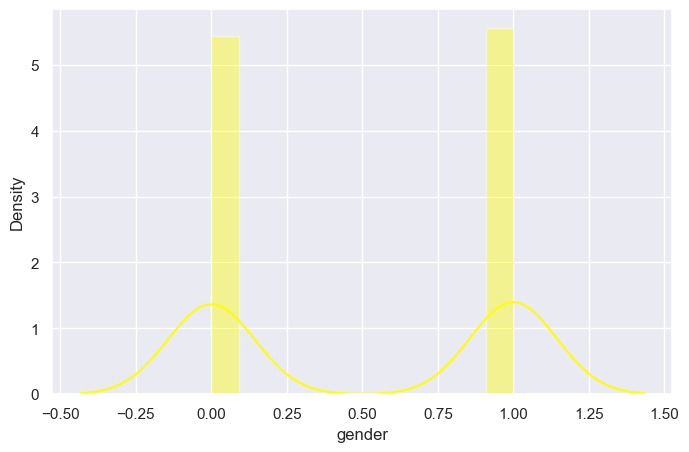

C:\Users\HP\AppData\Local\Temp\ipykernel_11988\3147996150.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j],kde=True, bins=11,color='yellow')


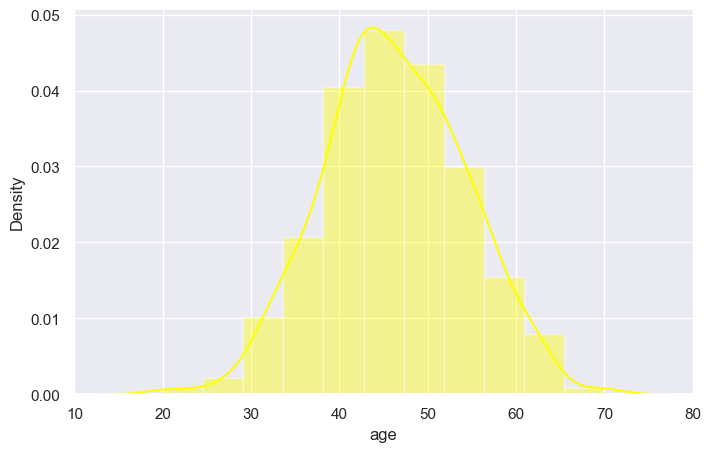

C:\Users\HP\AppData\Local\Temp\ipykernel_11988\3147996150.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j],kde=True, bins=11,color='yellow')


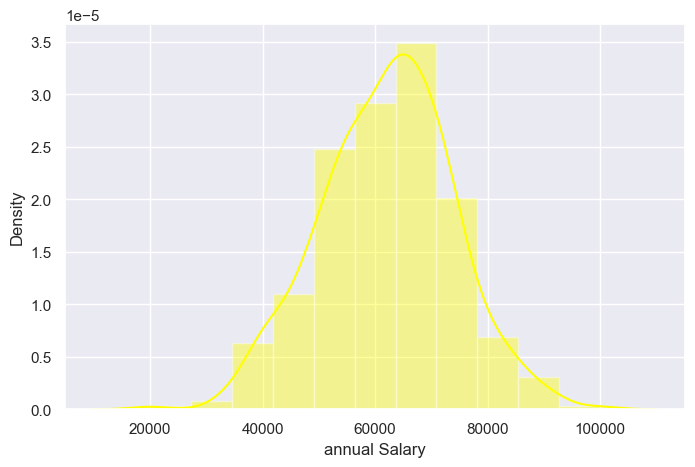

C:\Users\HP\AppData\Local\Temp\ipykernel_11988\3147996150.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j],kde=True, bins=11,color='yellow')


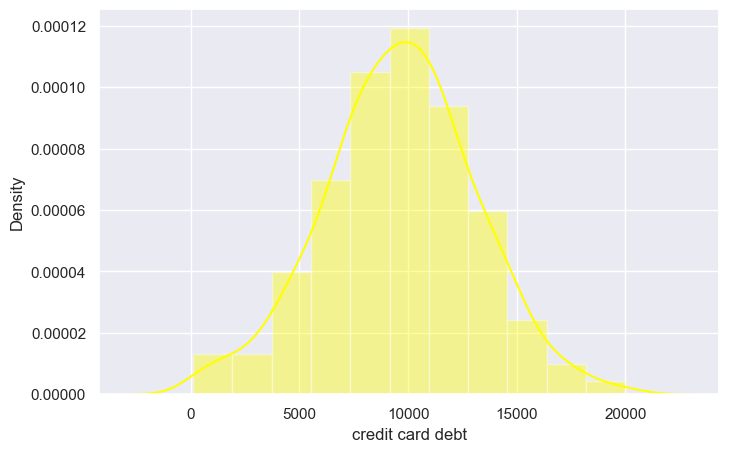

C:\Users\HP\AppData\Local\Temp\ipykernel_11988\3147996150.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j],kde=True, bins=11,color='yellow')


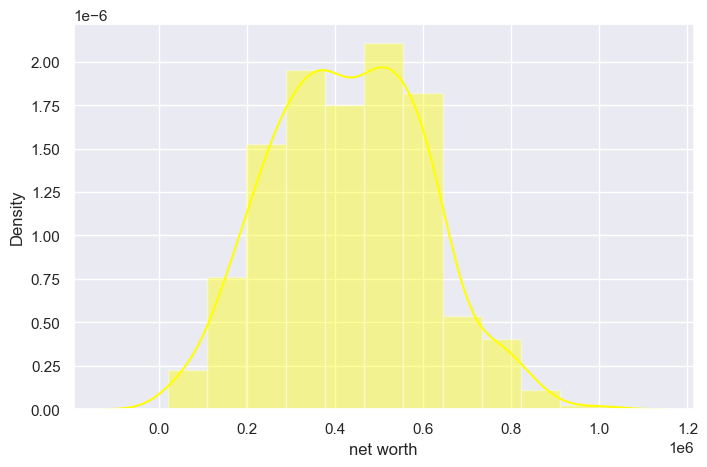

C:\Users\HP\AppData\Local\Temp\ipykernel_11988\3147996150.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j],kde=True, bins=11,color='yellow')


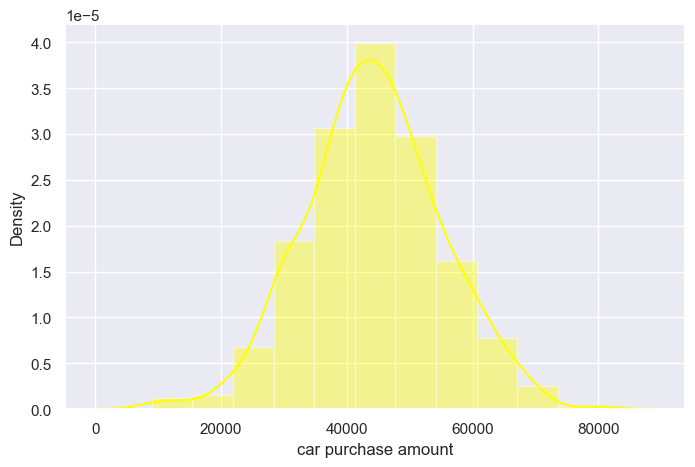

In [24]:
# Create a distribution plot (histogram)
cols = df.select_dtypes(include=['int64', 'float64'])
for j in cols.columns:
    sns.set(rc={'figure.figsize': (8,5)})
    sns.distplot(df[j],kde=True, bins=11,color='yellow')
    plt.show()

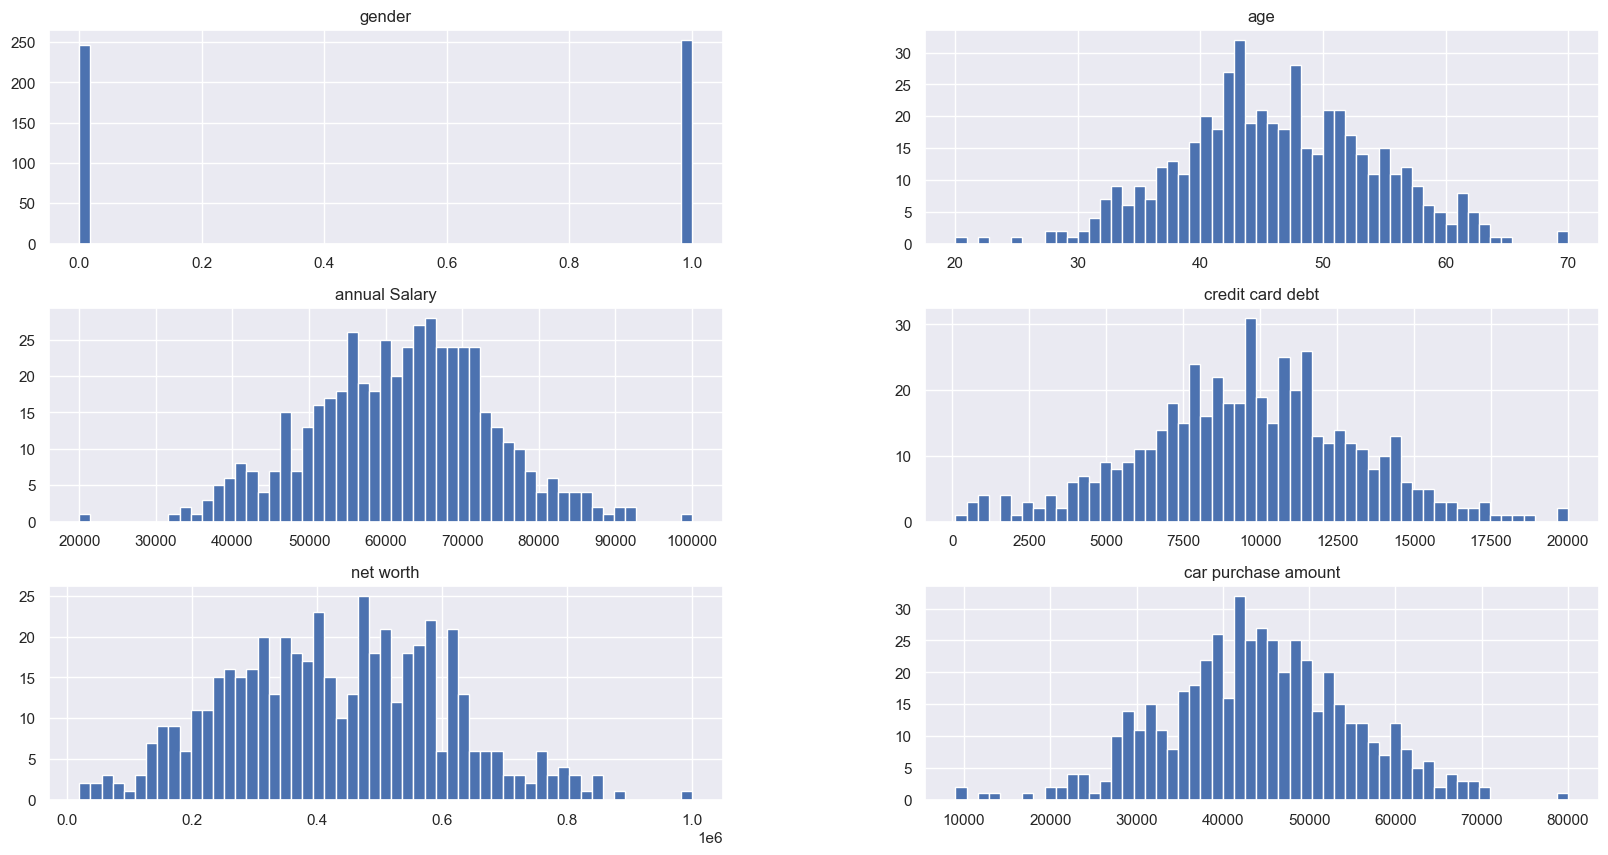

In [32]:
# Create a histogram for the DataFrame
df.hist(bins=55, figsize=(20,10))
plt.show()

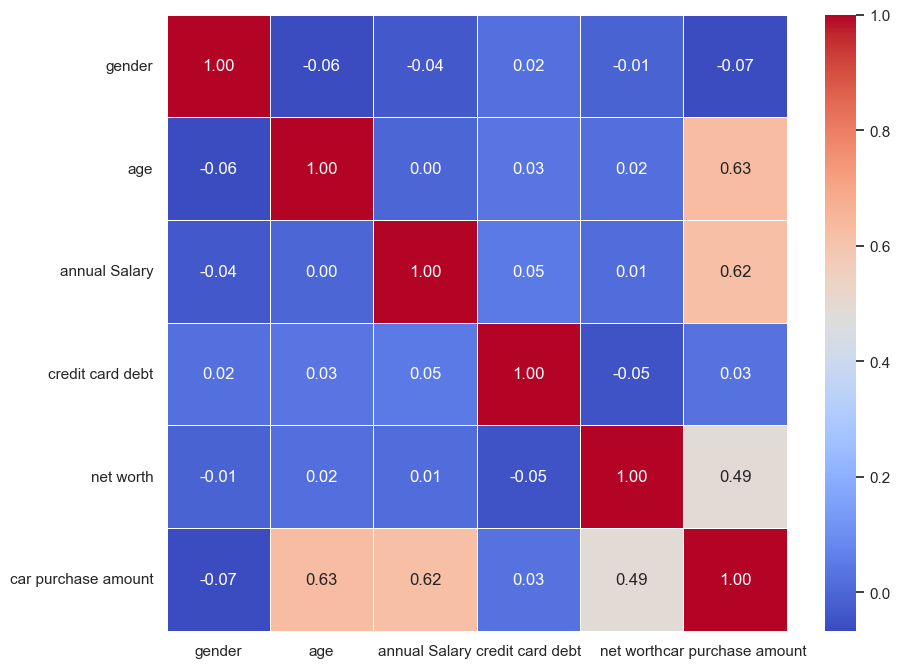

In [29]:
# Plotting the Correlation Matrix
numerical_columns = df.columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

- High Correlation between `car purchase amount` and `annual Salary`\.

### Define and Split data

In [35]:
# Defining X and y
X = df.drop(columns=['car purchase amount'])
y = df['car purchase amount']

# Shapes of X and y
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (500, 5)
Shape of y:  (500,)


In [37]:
# Scaling the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Shapes
print("Shape of X_scaled: ", X_scaled.shape)
print("Shape of y_scaled: ", y_scaled.shape)

Shape of X_scaled:  (500, 5)
Shape of y_scaled:  (500, 1)


## Splitting Data

In [38]:
from sklearn.model_selection import train_test_split
# Spliting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y_scaled, test_size=0.25, random_state=42)

In [40]:
# Shapes
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (375, 5)
y_train shape: (375, 1)
X_test shape: (125, 5)
y_test shape: (125, 1)


## **Model Development**

In [46]:
#  Import library & Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

# Predicting X_test
y_pred= model.predict(X_test)

### Model Evaluation

In [68]:
# Import metrics
from sklearn.metrics import (r2_score, mean_squared_error,
                              mean_absolute_error)

r2 = r2_score(y_test, y_pred)
print("R2_Score: ",r2 )

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ",mae )

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ",mse )

R2_Score:  0.9999999797959831
Mean Absolute Error:  1.6334006311805814e-05
Mean Squared Error:  4.258514288613454e-10


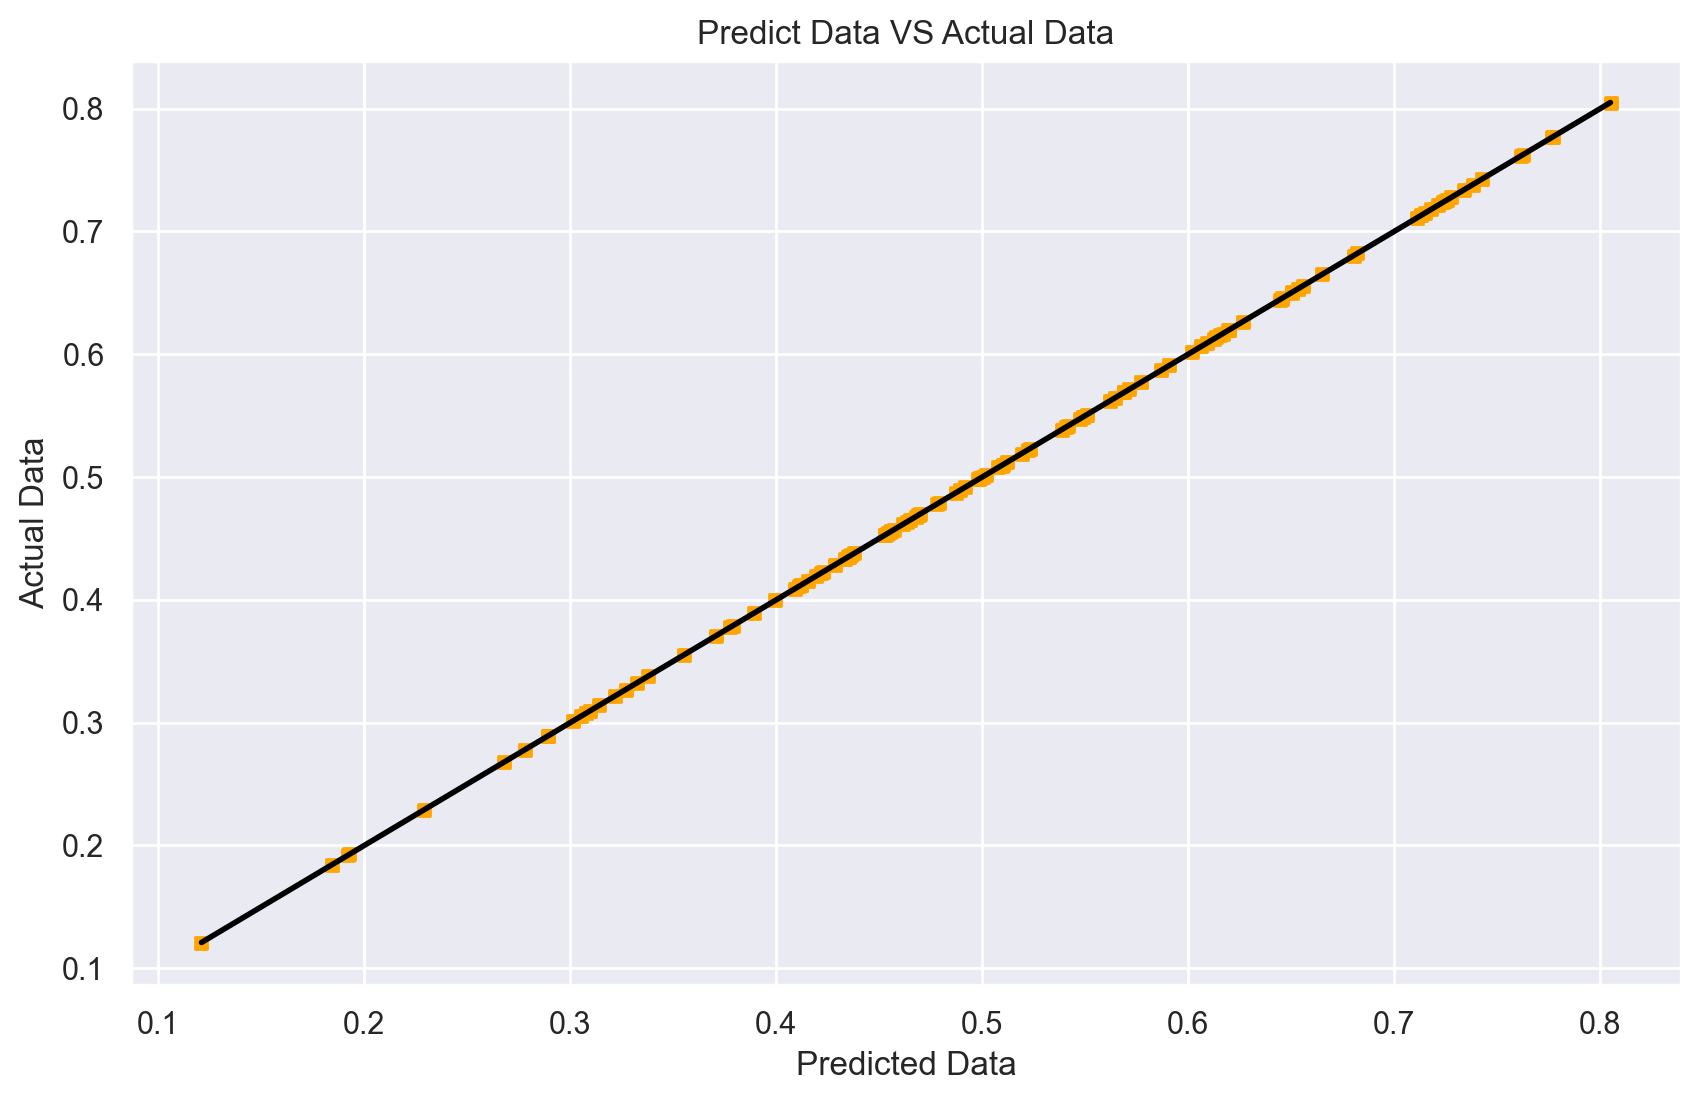

In [80]:
# Create a scatter plot comparing predicted data ('y_pred') to actual data ('y_test')
plt.figure(figsize=(10,6), dpi=200)
plt.scatter(y_pred,y_test,c='orange',marker='s',s=20)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c='black',lw=2)
plt.xlabel('Predicted Data')
plt.ylabel('Actual Data')
plt.title('Predict Data VS Actual Data')
plt.show()

## **Predict new Data**

In [69]:
prediction = model.predict([[0, 41, 53657, 87860, 57678]])

In [70]:
print(f"Predicted perchase amount is: {prediction[:,0]}")

Predicted perchase amount is: [57095.69687689]


---
## September 23, 2023